# Fake News Detection

In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

### Data Preparation and Cleaning

In [4]:
#Reading data
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [5]:
fake.shape
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true.shape
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
# Add a column to track fake and real news
fake['target'] = 'fake'
true['target'] = 'true'

In [10]:
# Concatenating and Shuffling dataframes
df = pd.concat([fake, true]).reset_index(drop = True)

from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)

In [11]:
df.head()

,title,text,subject,date,target
0,MUSLIM INVASION UPDATE: Gang Members In German...,"Deep down, they just want to assimilate Eight ...",politics,"Oct 21, 2015",fake
1,EPA chief spent almost half of spring in home ...,(Reuters) - The head of the U.S. Environmental...,politicsNews,"July 24, 2017",true
2,HEAD OF NATION’S TOP IMMIGRATION LAW ENFORCEME...,Obama s ICE Director Sarah Saldana is not the ...,left-news,"Jul 21, 2015",fake
3,Got bank? Election could create flood of marij...,October 31 (Reuters) - Although the sale of ma...,politicsNews,"October 31, 2016",true
4,"GCC summit to go ahead despite Qatar row, dipl...",KUWAIT (Reuters) - An annual summit of Gulf Ar...,worldnews,"November 29, 2017",true


In [12]:
# Removing the date and title (because I won't use them for the analysis)
df.drop(["date"],axis=1,inplace=True)
df.drop(["title"],axis=1,inplace=True)
          

In [13]:
print(df.isnull().sum())

text       0
subject    0
target     0
dtype: int64


In [17]:
# Convert all text to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

# Removing punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)

df.head()

,text,subject,target
0,deep down they just want to assimilate eight y...,politics,fake
1,reuters the head of the us environmental prot...,politicsNews,true
2,obama s ice director sarah saldana is not the ...,left-news,fake
3,october 31 reuters although the sale of marij...,politicsNews,true
4,kuwait reuters an annual summit of gulf arab ...,worldnews,true


In [20]:
#Removing stopwords
import nltk
from nltk.corpus import stopwords

In [22]:
nltk.download('stopwords')
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Exploration

fake    23481
true    21417
Name: target, dtype: int64


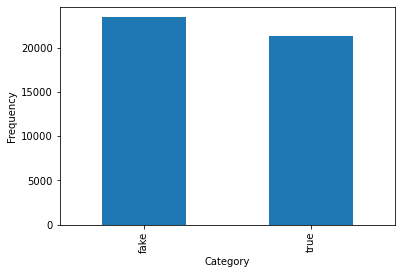

In [26]:
#Comparing Frequency of fake and true news in dataset
print(df['target'].value_counts())

df['target'].value_counts().plot(kind= 'bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


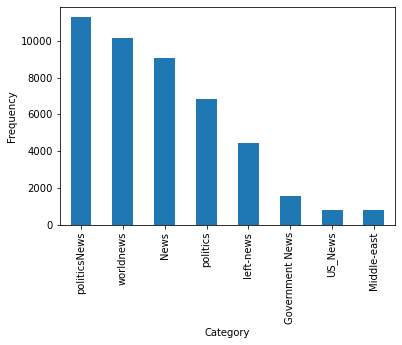

In [29]:
#Comparing Frequency of articles per subject in dataset
print(df['subject'].value_counts())
df['subject'].value_counts().plot(kind= 'bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

## Modeling

In [32]:
#Preparing X_train and Y_train
X_train,X_test,Y_train,Y_test = train_test_split(df['text'], df.target, test_size=0.2)

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, Y_train)

In [ ]:
#Fitting the model
classifier.fit(X_train,Y_train)

#Accuracy of the model
#prediction=classifier.predict(X_test)
#print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))